# Document Clustering Analysis of Book Chapters

### Overview:
In this notebook, I perform a document clustering analysis on chapters extracted from two iconic literary works: "War of the Worlds" by H.G. Wells and "Roots" by Alex Haley. The chapters from "War of the Worlds" were sourced from the Gutenberg website, a digital library offering free access to a vast collection of public domain texts. On the other hand, the chapters from "Roots" were obtained from antilogicalism.com, providing a rich and diverse selection of literary content.

Document clustering is a technique used in text mining and natural language processing to organize a set of documents into clusters, such that documents within a cluster are more similar to each other than to those in other clusters. 

### Data:
- Roots book: text file
- War of the Worlds: text file
- Stop Words: text file

### Objective:
My objective is to investigate whether document clustering algorithms can effectively organize chapters from these two distinct literary works based solely on their textual content. By applying natural language processing techniques, including text preprocessing, bag-of-words representation, and clustering algorithms, I aim to discern any thematic similarities or differences between the chapters and evaluate the clustering performance.

### Methodology:
1. **Data Acquisition:** Chapters from "War of the Worlds" and "Roots" were extracted from Project Gutenberg and Antilogicalism.com.
2. **Preprocessing:** Text data underwent preprocessing steps, data mining, including tokenization, chapter separation, and other cleaning techniques.
3. **Feature Extraction:** Chapters were represented using the bag-of-words model to transform textual data into numerical vectors.
4. **Clustering Analysis:** Document clustering algorithms were applied to group chapters based on their content similarities.
5. **Evaluation:** Clustering results were evaluated to assess the effectiveness of organizing chapters from different literary works.

### Conclusion:
Through this analysis, I aim to gain insights into the clustering behavior and ascertain whether chapters from "War of the Worlds" and "Roots" exhibit distinct thematic patterns that can be captured by document clustering algorithms.

### Data Mining, Data Preparation
- Data Mining Applied
- extract chapters from each book 
- save in one file

In [28]:
# import packages
import re
import sys
sys.path.append('/home/aletia/wsl_code/gatech/myenv/lib/python3.10/site-packages')
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
# # set stopwords
download_directory = '/home/aletia/wsl_code/gatech/cse-6040/extra-credit/data/nltk_data'

# # download stopwords to the specified directory
# nltk.download('stopwords', download_dir=download_directory)

# load stopwords from the specified directory
# set the data path for NLTK to your custom directory
nltk.data.path.append(download_directory)
stop_words = stopwords.words('english')

In [35]:
# extract roots chapters
def extract_roots(text):
    chapter_pattern = re.compile(r"(CHAPTER \d{1,3}.*?)(?=CHAPTER \d{1,3}|$)", re.DOTALL)
    # desired chapters
    chapters = chapter_pattern.findall(text)[120:]
    cleaned = []
    for chapter in chapters:
        cleaned.append(chapter.strip().replace('\n', ' '))
    return cleaned  

# preprocess text: remove stopwords and convert to lowercase
def preprocess_text(text):
    return ' '.join([word.lower() for word in text.split() if word.lower() not in stop_words]) 


In [36]:
with open('data/roots.txt', 'r', encoding='utf-8') as file:
    text_roots = file.read()
    
roots_list = (extract_roots(text_roots))
for r in roots_list:
    print(r)


CHAPTER 1 Early in the spring of 1750, in the village of Juffure, four days upriver from the coast of The Gambia, West Africa, a man-child was born to Omoro and Binta Kinte. Forcing forth from Binta’s strong young body, he was as black as she was, flecked and slippery with Binta’s blood, and he was bawling. The two wrinkled midwives, old Nyo Boto and the baby’s Grandmother Yaisa, saw that it was a boy and laughed with joy. According to the forefathers, a boy firstborn presaged the special blessings of Allah not only upon the parents but also upon the parents’ families; and there was the prideful knowledge that the name of Kinte would thus be both distinguished and perpetuated. It was the hour before the first crowing of the cocks, and along with Nyo Boto and Grandma Yaisa’s chatterings, the first sound the child heard was the muted, rhythmic bompa-bomp-a-bomp of wooden pestles as the other women of the village pounded couscous grain in their mortars, preparing the traditional breakfast

In [37]:
# extract wotw chapters
with open('data/wotw.txt', 'r', encoding='utf-8') as file:
    text_wotw = file.read()
    
# Regular expression to capture everything starting from "BOOK ONE" or "BOOK TWO" until the end or the next such header
book_pattern = re.compile(r"(BOOK (?:ONE|TWO)).*?\n(.+?)(?=BOOK (?:ONE|TWO)|\Z)", re.DOTALL)

# Apply regex to find matches
book_matches = book_pattern.findall(text_wotw)[2:]

book1 = (book_matches[0][1].strip().replace('\n', ' '))

book2 = (book_matches[1][1].strip().replace('\n', ' '))

In [38]:
chapters_book1 = [
    "I. THE EVE OF THE WAR.",
    "II. THE FALLING STAR.",
    "III. ON HORSELL COMMON.",
    "IV. THE CYLINDER OPENS.",
    "V. THE HEAT-RAY.",
    "VI. THE HEAT-RAY IN THE CHOBHAM ROAD.",
    "VII. HOW I REACHED HOME.",
    "VIII. FRIDAY NIGHT.",
    "IX. THE FIGHTING BEGINS.",
    "X. IN THE STORM.",
    "XI. AT THE WINDOW.",
    "XII. WHAT I SAW OF THE DESTRUCTION OF WEYBRIDGE AND SHEPPERTON.",
    "XIII. HOW I FELL IN WITH THE CURATE.",
    "XIV. IN LONDON.",
    "XV. WHAT HAD HAPPENED IN SURREY.",
    "XVI. THE EXODUS FROM LONDON.",
    "XVII. THE “THUNDER CHILD”."
]

chapters_book2 = [
    "I. UNDER FOOT.",
    "II. WHAT WE SAW FROM THE RUINED HOUSE.",
    "III. THE DAYS OF IMPRISONMENT.",
    "IV. THE DEATH OF THE CURATE.",
    "V. THE STILLNESS.",
    "VI. THE WORK OF FIFTEEN DAYS.",
    "VII. THE MAN ON PUTNEY HILL.",
    "VIII. DEAD LONDON.",
    "IX. WRECKAGE.",
    "X. THE EPILOGUE."
]

def extract_chapters(text, chapter_titles):
    chapters = []
    for title in chapter_titles:
        if title in text:
            start_index = text.find(title) + len(title)
            end_index = text.find(chapter_titles[chapter_titles.index(title) + 1]) if chapter_titles.index(title) + 1 < len(chapter_titles) else len(text)
            chapter_text = text[start_index:end_index].strip()
            chapters.append(f"{title} {chapter_text}")
    return chapters
            
wotw_list = extract_chapters(book1, chapters_book1) + extract_chapters(book2, chapters_book2)

for w in wotw_list:
    print(w)

I. THE EVE OF THE WAR. No one would have believed in the last years of the nineteenth century that this world was being watched keenly and closely by intelligences greater than man’s and yet as mortal as his own; that as men busied themselves about their various concerns they were scrutinised and studied, perhaps almost as narrowly as a man with a microscope might scrutinise the transient creatures that swarm and multiply in a drop of water. With infinite complacency men went to and fro over this globe about their little affairs, serene in their assurance of their empire over matter. It is possible that the infusoria under the microscope do the same. No one gave a thought to the older worlds of space as sources of human danger, or thought of them only to dismiss the idea of life upon them as impossible or improbable. It is curious to recall some of the mental habits of those departed days. At most terrestrial men fancied there might be other men upon Mars, perhaps inferior to themselve

In [39]:
# label the chapters for tracking
labelled_roots = [('Roots', chapter) for chapter in roots_list]
labelled_wotw = [('WOTW', chapter) for chapter in wotw_list]

# combine into a single list
combined_chapters = labelled_roots + labelled_wotw

# extract true labels for plotting
true_labels = [label for label, chapter in combined_chapters]

# get corpus, apply data cleaning
chapters_texts = [preprocess_text(chapter) for label, chapter in combined_chapters]

### Document Clustering

Start with 2 clusters, then possibley try additional clustering

**TF-IDF**

Term Frequency (TF)

Term Frequency measures how frequently a term occurs in a document. It is calculated as the number of times a term 
𝑡
t appears in a document 
𝑑
d, divided by the total number of terms in that document. The idea is to understand how frequently a term is used within the context of a single document.
​
Inverse Document Frequency (IDF)

Inverse Document Frequency measures the importance of a term across a set of documents. It is calculated as the logarithm of the ratio of the total number of documents to the number of documents containing the term 
𝑡
t. The logic behind IDF is that terms that appear in many different documents are less significant than those that appear in fewer documents.

TF-IDF

The TF-IDF value is simply the multiplication of TF and IDF. The resulting value represents the importance of a term in a specific document, adjusted for its commonness or rarity in the entire document set.

TF-IDF Matrix

A TF-IDF matrix is a structured representation where each row represents a document, and each column represents a term from the corpus, forming a matrix. The entries in this matrix are the

TF-IDF values for each term in each document. This matrix is often sparse because most terms do not appear in most documents, and thus, many entries are zero.

In [40]:
# import libraries for data handling and manipulation
import numpy as np

# machine learning and dimensionality reduction tools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# library for plotting
import matplotlib.pyplot as plt

In [41]:

# initialize term frequency-inverse document frequency matrix
# each row represents a document, and each column represents a term from the corpus, forming a matrix
vectorizer = TfidfVectorizer(max_features=1000)

# fit the vectorizer to the text
X = vectorizer.fit_transform(chapters_texts)

# define the number of clusters: starting with 2
kmeans = KMeans(n_clusters=2, random_state=0)

# fit the kmeans model to the data
clusters = kmeans.fit_predict(X)

# combine the original chapter labels (from both books) with their corresponding cluster labels
clustered_data = list(zip([label for label, chapter in combined_chapters], clusters))

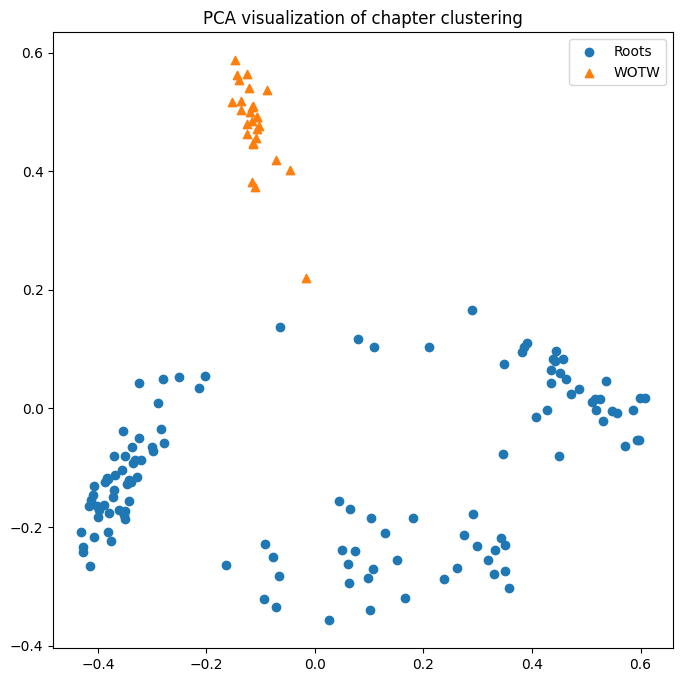

In [43]:
# convert the TF-IDF matrix from sparse to dense, then apply PCA
X_dense = np.asarray(X.todense())
pca = PCA(n_components=2, svd_solver='auto')
X_pca = pca.fit_transform(X_dense)

# convert to NumPy array for safe plotting
X_pca = np.asarray(X_pca)

# Plot
plt.figure(figsize=(8, 8))
for label, marker in [('Roots', 'o'), ('WOTW', '^')]:
    indices = [i for i, l in enumerate(true_labels) if l == label]
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=label, marker=marker)
plt.title('PCA visualization of chapter clustering')
plt.legend()
plt.show()

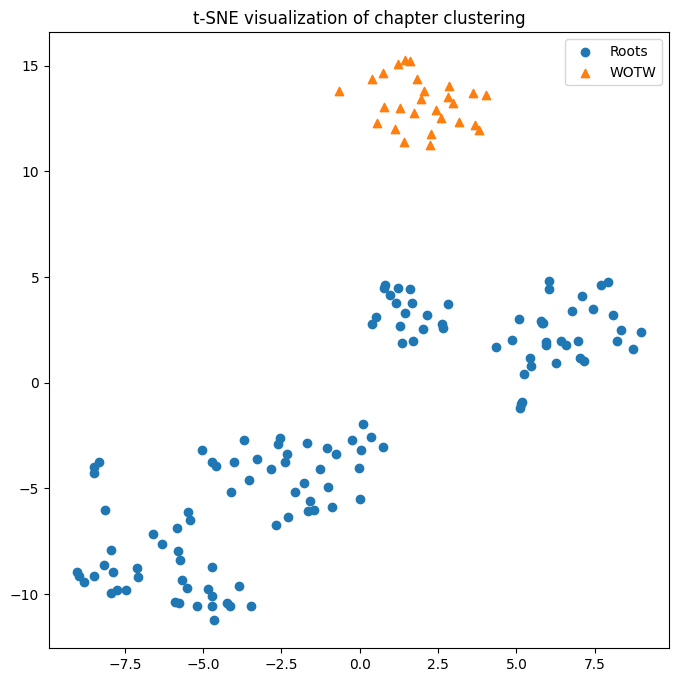

In [44]:
# # dimensionality reduction using t-SNE, which can handle sparse input
# X can be sparse
tsne = TSNE(n_components=2, metric="cosine", init='random', random_state=0)
X_tsne = tsne.fit_transform(X)  

# convert to NumPy array for safe plotting
X_tsne = np.asarray(X_tsne)

# plot
plt.figure(figsize=(8, 8))
for label, marker in [('Roots', 'o'), ('WOTW', '^')]:
    indices = [i for i, l in enumerate(true_labels) if l == label]
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=label, marker=marker)
plt.title('t-SNE visualization of chapter clustering')
plt.legend()
plt.show()


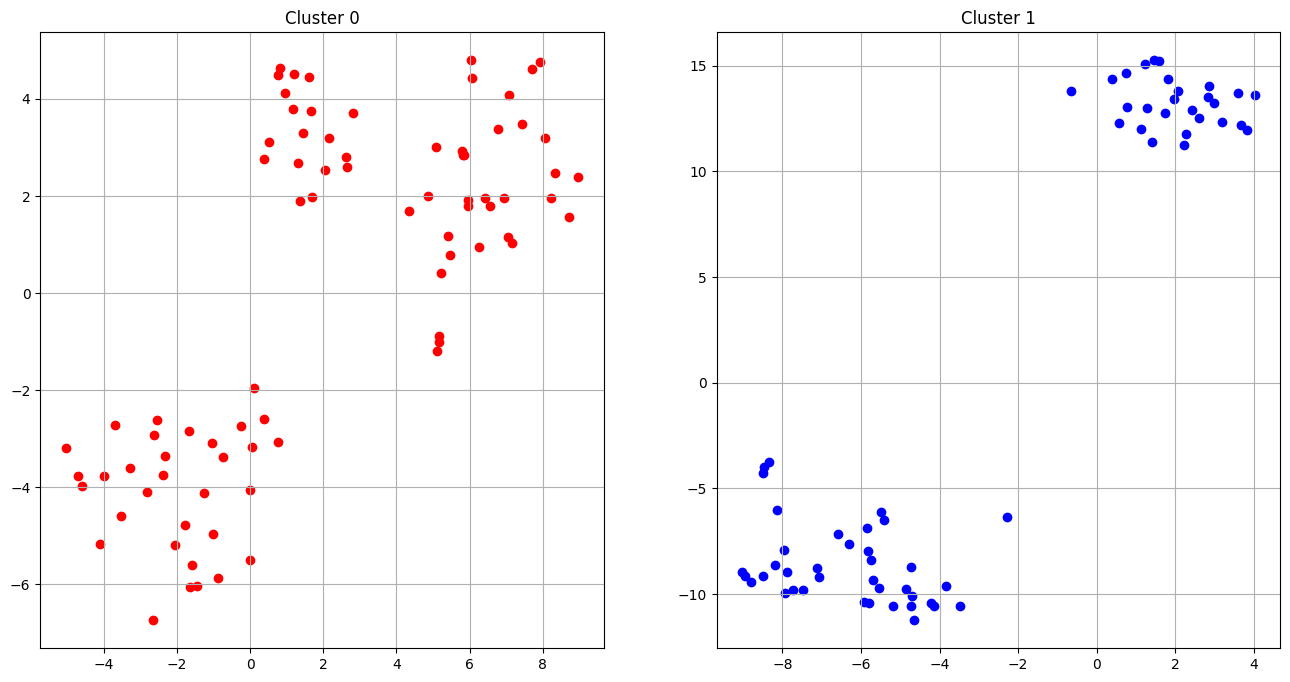

In [45]:
# 'X_tsne' is the dimensionality-reduced data and 'clusters' is the array of cluster labels

fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # Create a figure with two subplots

# plot for Cluster 0
cluster_indices = [i for i, x in enumerate(clusters) if x == 0]
axs[0].scatter(X_tsne[cluster_indices, 0], X_tsne[cluster_indices, 1], color='red')
axs[0].set_title('Cluster 0')
axs[0].grid(True)

# plot for Cluster 1
cluster_indices = [i for i, x in enumerate(clusters) if x == 1]
axs[1].scatter(X_tsne[cluster_indices, 0], X_tsne[cluster_indices, 1], color='blue')
axs[1].set_title('Cluster 1')
axs[1].grid(True)

# display the plots
plt.show()

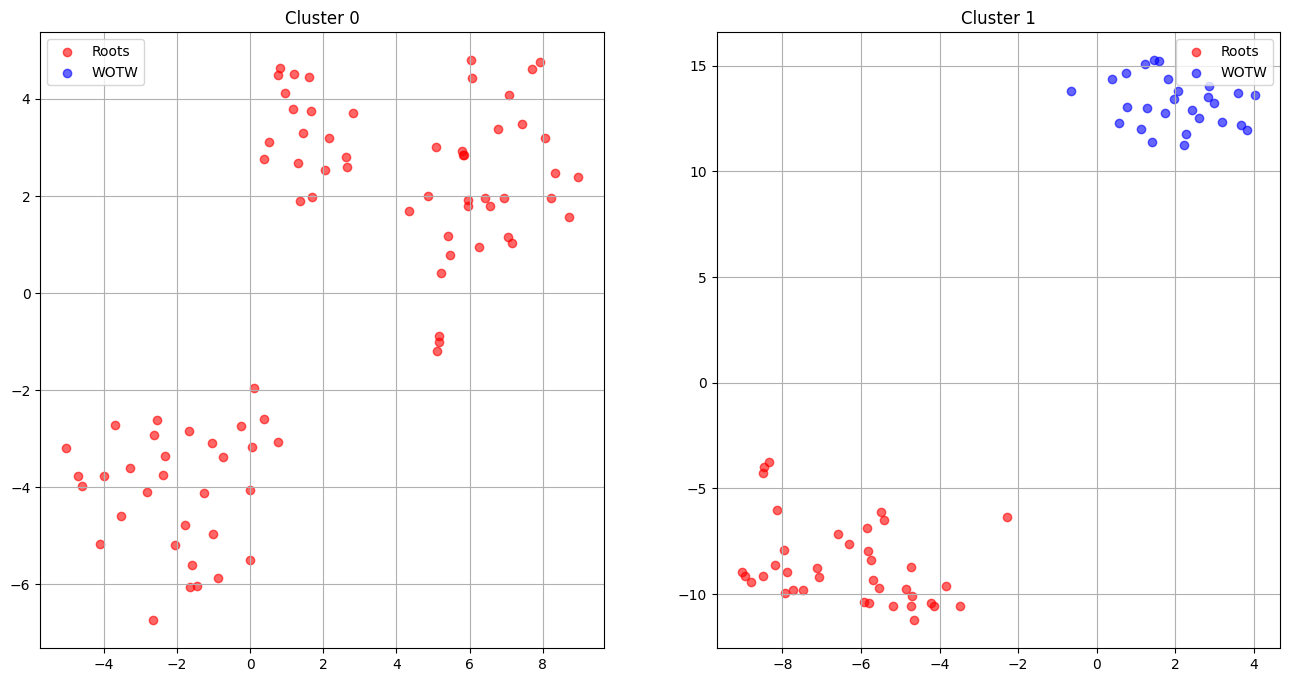

In [46]:
# 'X_tsne' is the dimensionality-reduced data and 'clusters' is the array of cluster labels
# true_labels contains the book labels ('Roots' or 'WOTW')

fig, axs = plt.subplots(1, 2, figsize=(16, 8))  

# define colors or markers for each book
colors = {'Roots': 'red', 'WOTW': 'blue'}

# plot for Cluster 0
cluster0_indices = [i for i, x in enumerate(clusters) if x == 0]
for label in set(true_labels):  
    indices = [i for i in cluster0_indices if true_labels[i] == label]
    axs[0].scatter(X_tsne[indices, 0], X_tsne[indices, 1], color=colors[label], label=label, alpha=0.6)
axs[0].set_title('Cluster 0')
axs[0].legend()
axs[0].grid(True)

# plot for Cluster 1
cluster1_indices = [i for i, x in enumerate(clusters) if x == 1]
for label in set(true_labels):
    indices = [i for i in cluster1_indices if true_labels[i] == label]
    axs[1].scatter(X_tsne[indices, 0], X_tsne[indices, 1], color=colors[label], label=label, alpha=0.6)
axs[1].set_title('Cluster 1')
axs[1].legend()
axs[1].grid(True)

# display the plots
plt.show()


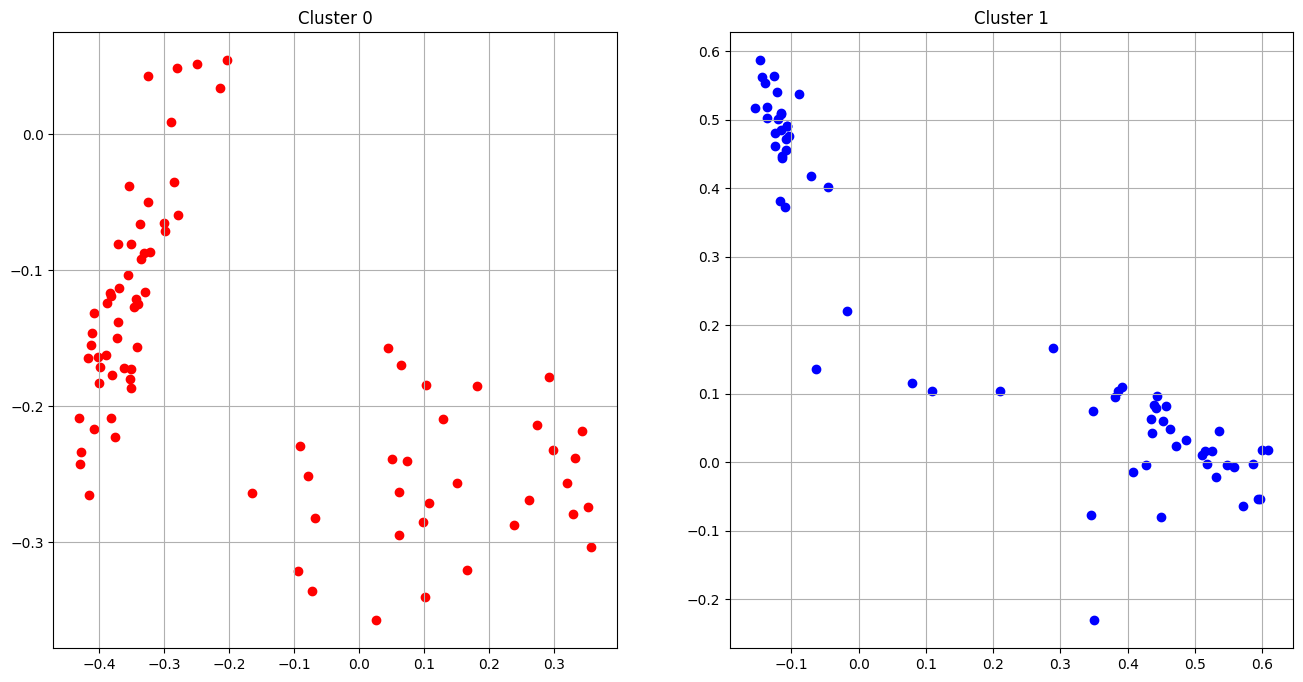

In [47]:
# 'X_pca' is the PCA-reduced data and 'clusters' is the array of cluster labels

fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # Create a figure with two subplots

# Plot for Cluster 0
cluster_indices = [i for i, x in enumerate(clusters) if x == 0]
axs[0].scatter(X_pca[cluster_indices, 0], X_pca[cluster_indices, 1], color='red')
axs[0].set_title('Cluster 0')
axs[0].grid(True)

# Plot for Cluster 1
cluster_indices = [i for i, x in enumerate(clusters) if x == 1]
axs[1].scatter(X_pca[cluster_indices, 0], X_pca[cluster_indices, 1], color='blue')
axs[1].set_title('Cluster 1')
axs[1].grid(True)

# Display the plots
plt.show()

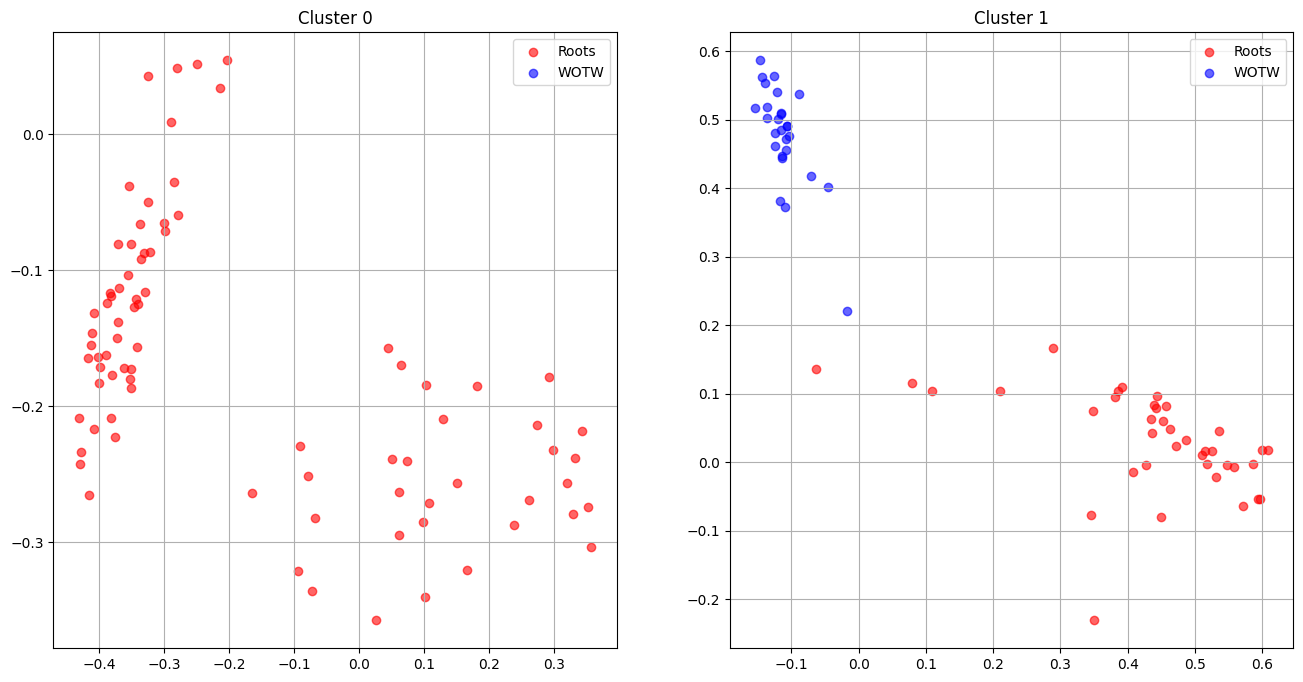

In [48]:
# 'X_pca' is the PCA-reduced data, 'clusters' is the array of cluster labels, and 'true_labels' contains the book labels
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Define colors or markers for each book
colors = {'Roots': 'red', 'WOTW': 'blue'}

# Plot for Cluster 0
cluster0_indices = [i for i, x in enumerate(clusters) if x == 0]
for label in set(true_labels):  # Loop through each unique label in the true_labels list
    indices = [i for i in cluster0_indices if true_labels[i] == label]  # Filter indices for each label within Cluster 0
    axs[0].scatter(X_pca[indices, 0], X_pca[indices, 1], color=colors[label], label=label, alpha=0.6)
axs[0].set_title('Cluster 0')
axs[0].legend()
axs[0].grid(True)

# Plot for Cluster 1
cluster1_indices = [i for i, x in enumerate(clusters) if x == 1]
for label in set(true_labels):
    indices = [i for i in cluster1_indices if true_labels[i] == label]  # Filter indices for each label within Cluster 1
    axs[1].scatter(X_pca[indices, 0], X_pca[indices, 1], color=colors[label], label=label, alpha=0.6)
axs[1].set_title('Cluster 1')
axs[1].legend()
axs[1].grid(True)

# Display the plots
plt.show()